# COMP 2002 - Intro to AI
## Week 4 - Deep Learning Exercises

#### Load Required Libraries for the Exercises

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras import layers

### Exercise 1

In [2]:
inputs = tf.keras.Input(shape=(784,))

In [3]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

2022-02-28 11:54:24.434566: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-28 11:54:24.734635: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21140 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:3f:00.0, compute capability: 8.6


[GPU Support Installation](https://www.tensorflow.org/install/gpu)

If you get an error about NUMA Nodes look [here](https://stackoverflow.com/questions/44232898/memoryerror-in-tensorflow-and-successful-numa-node-read-from-sysfs-had-negativ).

Note, this message (I think)is just saying Tensorflow will use special CPU instructions (AVX2 etc), for some reason it shows this message as a warning. Bit silly, but nothing to worry about.

[Stackoverflow Question about this Warning](https://stackoverflow.com/questions/65298241/what-does-this-tensorflow-message-mean-any-side-effect-was-the-installation-su)

In [4]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [5]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [7]:
model.compile(
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
 optimizer=tf.keras.optimizers.RMSprop(),
 metrics=["accuracy"],
)
history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_scores[1])

Epoch 1/2
132/750 [====>.........................] - ETA: 0s - loss: 0.7448 - accuracy: 0.7878

2022-02-28 11:58:55.324414: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


750/750 [==============================] - 2s 1ms/step - loss: 0.3481 - accuracy: 0.9005 - val_loss: 0.1943 - val_accuracy: 0.9433
Epoch 2/2
750/750 [==============================] - 1s 1ms/step - loss: 0.1587 - accuracy: 0.9531 - val_loss: 0.1407 - val_accuracy: 0.9588
313/313 - 0s - loss: 0.1252 - accuracy: 0.9613 - 194ms/epoch - 621us/step
Test accuracy: 0.9613000154495239


### Exercise 2

In [8]:
predictions = model.predict(x_test).argmax(axis=1)

In [9]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

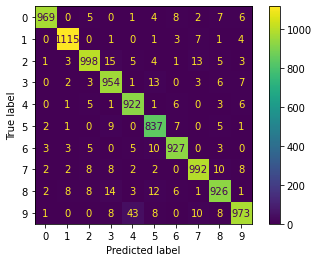

In [10]:
cm = confusion_matrix(predictions,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()